# Balancer Simulations Math Challenge - Basic Exercises

This is a series of exercises to gain intuition for the core algorithm in Balancer Pools: the Value Function, and invariant V.

**Exercise:** We'll work on Step 1 questions in our working session on May 25 in teams of 2, facilitated by @Octopus and @akrtws.  
**Challenges:** Step 2 will be homework assignments, submitting at least one challenge solved is mandatory for successful participation!  
Here's the notebook with challenges: https://github.com/TokenEngineeringCommunity/BalancerPools_Model/blob/fcb67145e8b0f8a1843fe3c6921dbb5a7085938e/Math%20Challenges-Advanced.ipynb

## Exercise:   
Let's set up a pool.  

We have 100 Token A and 100 Token B, with equal weights.  
The price definition in our pool is constraint by the
Invariant V in Balancer Pools. 

a_bal = balance of token A  
b_bal = balance of token B  
a_weight = weight of token A  
b_weight = weight of token B   

The weights in this pool are equal for both tokens.
For now, we don't have a swap fee.

# Q1.1: 
What's the initial spot price of token A in token B?

The initial spot price is 1:1 due to the equal number of tokens and the equal weigths

# Q1.2:
Now let's assume a series of 99 swaps. With every swap, **1.0 token A is bought from the pool, against token B**.  

**a) Create a table "buy_A"** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function. 

**b) What do you notice in general?**
Write down your findings (in words).

**c) How much would Alice have to pay in token B when buying the first 1.0 token A?**
Write down your findings (in words). Compare with the initial Spotprice.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#set up genesis state
a_bal = 100 # initial balance
b_bal = 100 # initial balance
a_weight = 0.5 #define weight
b_weight = 0.5 #define weight
s_f = 0.0 #swap fee
inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(100,0,-1))
#create dataframe with based on a_vals
List = pd.DataFrame(a_vals, columns=['token_A'])

#create values for plot, add Y_balances according to current invariant
List['invariant'] = inv #value required to calculate token B value
List['token_B'] = (List.invariant/(List.token_A**a_weight))**(1/b_weight)# calculate corresponding token_B value according to invariant
List['Spot Price'] = List.token_B / List.token_A

List['In-Given-Out'] = List.token_B * (( List.token_A / (List.token_A-1) )**(a_weight/b_weight) -1)

List

,token_A,invariant,token_B,Spot Price,In-Given-Out
0,100,100.0,100.000000,1.000000,1.010101
1,99,100.0,101.010101,1.020304,1.030715
2,98,100.0,102.040816,1.041233,1.051967
3,97,100.0,103.092784,1.062812,1.073883
4,96,100.0,104.166667,1.085069,1.096491
...,...,...,...,...,...
95,5,100.0,2000.000000,400.000000,500.000000
96,4,100.0,2500.000000,625.000000,833.333333
97,3,100.0,3333.333333,1111.111111,1666.666667
98,2,100.0,5000.000000,2500.000000,5000.000000


## Comments

b) As the value of token_A is defined with respect to the value of token_B, as the amount of token_A decreases, the value of token_A increases. For token_B, the behavior is right the oposit: the amount of tokens increses while the relative value of them against token_A decreases.
IMPORTANT: spot price is the actual price in the pool, however, due to the limited depth of the pool and the effect of the trades on it (slippage), no transaction is performed at the spot price (only infinitesimal transactions). The real price to be paid at any point is shown in the colum 'In-Given_Out' where slippage is included in the calculations.

c) look at colum 'In-Given_Out'. The price to buy token_A with token_B increases throught the swaps as token_A revalues against token_B 



# Q1.3:

Now let's assume a series of 99 swaps in the opposite direction. We start again with the original state: We have 100 Token A and 100 Token B.   
With every swap, **1.0 token B is bought from the pool, against token A**.

Create a table **'buy_B'** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function.

In [3]:
#set up genesis state
a_bal = 100 # initial balance
b_bal = 100 # initial balance
a_weight = 0.5 #define weight
b_weight = 0.5 #define weight
s_f = 0.0 #swap fee
inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
b_vals = pd.Series(range(100,0,-1))
#create dataframe with based on a_vals
List_2 = pd.DataFrame(b_vals, columns=['token_B'])

#create values for plot, add Y_balances according to current invariant
List_2['invariant'] = inv #value required to calculate token B value
List_2['token_A'] = (List_2.invariant/(List_2.token_B**b_weight))**(1/a_weight)# calculate corresponding token_B value according to invariant
List_2['Spot Price'] = List_2.token_A / List_2.token_B

List_2['In-Given-Out'] = List_2.token_A * (( List_2.token_B / (List_2.token_B-1) )**(a_weight/b_weight) -1)

List_2.tail(20)

,token_B,invariant,token_A,Spot Price,In-Given-Out
80,20,100.0,500.000000,25.000000,26.315789
81,19,100.0,526.315789,27.700831,29.239766
82,18,100.0,555.555556,30.864198,32.679739
83,17,100.0,588.235294,34.602076,36.764706
84,16,100.0,625.000000,39.062500,41.666667
85,15,100.0,666.666667,44.444444,47.619048
86,14,100.0,714.285714,51.020408,54.945055
87,13,100.0,769.230769,59.171598,64.102564
88,12,100.0,833.333333,69.444444,75.757576
89,11,100.0,909.090909,82.644628,90.909091


We see exactly the same behavior in the opposite direction. This is possible because both initial balances and weights are the same.

# Q1.4:

a) What are the new balances of token A and token B after 90 swaps token A (in) for B (out)?

b) How much would Alice have to pay in token A in case she wants to buy the 91st token B? 

a)  After 90 swaps balances are:
    token_B = 10
    token_A = 1000
    SP = 100
b)  Cost of buying an extra token_B = 111,1111111

# Q1.5:  
Now create a graph (use plotly or similar), and draw the full curve for this series of both kinds of swaps - the AMM curve.

In [4]:
#plot curves with all 
List = List[['token_A', 'token_B']]
List_2 = List_2[['token_B', 'token_A']]
curve = pd.concat([List.iloc[::-1], List_2], axis=0, ignore_index=True)
fig = px.line(curve, x="token_A", y="token_B")
fig.update_xaxes(range=[0, 1000])
fig.update_yaxes(range=[0, 1000])
fig.update_layout(height=1000, width=1000, title_text='<b>AMM Curve</b>')

fig.show()

# Q1.6:
Take this plot, and mark 
- the initial price in Q1.1 (starting price)
- the new price in Q1.4 (after 90 swaps)

Side note: Why is it actually not appropriate to call this a "price". What would be a better name?

In [10]:
fig = px.line(curve, x="token_A", y="token_B")
fig.update_xaxes(range=[0, 1000])
fig.update_yaxes(range=[0, 1000])
fig.update_layout(height=1000, width=1000, title_text='<b>                       AMM Curve</b>')

fig.add_annotation(x=100, y=100,
            text="SP = 100/100 = 1",
            showarrow=True,
            arrowhead=1,
             )

fig.add_annotation(x=10, y=1000,
            text="SP = 1000/10 = 100",
            showarrow=True,
            arrowhead=1,
             )

fig.show()


The accurate name is 'Spot Price' but it only reflects a 'price' understood as the amount of X the buyers needs to pay) when the trade has no effect over the pool (slippage effect ~ 0), that only happens when the amount to trade is despicable vs the amount of liquidity in the pool.

# Q1.7:
Formulate a "rule of a thumb", how do swaps effect the price?

If I buy token_A (what reduces the amount of token_A in the pool) by paying token_B (what increases the amount of token_B in the pool), the relative value of token_A vs token_B increases. 

Buying token_B with token_A produces the same effect in the other direction.

## Additional questions:

**Q1.8:** Buying A) 99 tokens at once vs. B) buying 99x 1 token
Is there a difference in terms of the number of tokens you have to swap in? Is it "more expensive" to swap 99 times?
**Answer: no, there's no difference - you pay the same amount no matter if you buy 1 at a time or 99 at once. Intuition: you are moving on the SAME curve, no matter if you take a huge leap, or walk in small steps.**

**Q1.9:** Swap fees for buying 99 tokens at once vs. buying 99x 1 token
Again, does it matter in terms of the total amount of tokens (change in balance+ fees) you have to pay?


**Q1.10:** Price changes and position at the curve
For a relative change in price, does it matter where we are at the curve? ( @mark richardson | bancor explained it very nicely, you might want to watch the recording again, will share it by tomorrow)

**Q1.11:** Price changes, position at the curve and unequal weights
What's the effect of weights on this? If weights are not equal, and we want to move prices, does it matter where we are at the curve?


## Solution Q1.9 - by @AngelaKTE (Twitter @akrtws)
Swap fees for buying 99 tokens at once vs. buying 99x 1 token Again, does it matter in terms of the total amount of tokens you have to pay/send to the pool?

**Answer: Yes, is does matter. With fees, it's more expensive to buy 99 x1 tokens.**

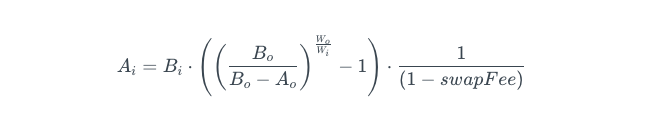

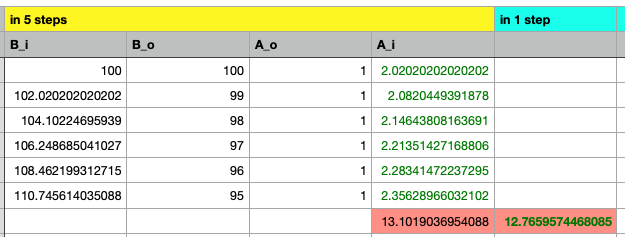

# Now, let's consider weights!

We continue with the value function V = a^w_a*b^w_b  
where  
a = balance of token asset A  
b = balancer of token asset B  
w_a = weight of token asset A  
w_b = weight of token asset B  

# Q2.1:  
Write down the value function for the pool in Q1.1!

Value Function:

$V = B_1^{W_1} * B_2^{W_2}$

With other nomenclature:

$V = a^{w_a} * b^{w_b}$


# Q2.2:
Let's got back to your initial balances in Step 1 in the pool:  
100 tokens A  
100 tokens B  

How do you need to change the weights in order to land at a **price of  
4 tokens A : 1 token B**

Understanding price as Spot Price:

$$SP = \frac{\frac{a}{w_a}}{\frac{b}{w_b}}$$

as $a = b = 100$

$$SP = \frac{\frac{100}{w_b}}{\frac{100}{w_a}} = \frac{w_a}{w_b} = 4$$

$$w_a = 4*w_b$$

and 

$$w_a + w_b = 1$$

$$5*w_b = 1$$

$$w_a = 0.8$$

$$w_b = 0.2$$

# Q2.3:
Create a graph showing the new AMM Curve in Q2.2  
Compare to the graph in Q1.4 - how does a change in weights change the graph?

In [6]:
#set up genesis state
a_bal = 100 # initial balance
b_bal = 100 # initial balance
a_weight = 0.8 #define weight
b_weight = 0.2 #define weight
s_f = 0.0 #swap fee
inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(1000,0,-1))
#create dataframe with based on a_vals
List = pd.DataFrame(a_vals, columns=['token_A'])

#create values for plot, add Y_balances according to current invariant
List['invariant'] = inv #value required to calculate token B value
List['token_B'] = (List.invariant/(List.token_A**a_weight))**(1/b_weight)# calculate corresponding token_B value according to invariant
List['Spot Price'] = List.token_B / List.token_A

List['In-Given-Out'] = List.token_B * (( List.token_A / (List.token_A-1) )**(a_weight/b_weight) -1)


a_bal = 100 # initial balance
b_bal = 100 # initial balance
a_weight = 0.5 #define weight
b_weight = 0.5 #define weight
s_f = 0.0 #swap fee
inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(1000,0,-1))
#create dataframe with based on a_vals
List_old = pd.DataFrame(a_vals, columns=['token_A'])

#create values for plot, add Y_balances according to current invariant
List_old['invariant'] = inv #value required to calculate token B value
List_old['token_B_old'] = (List_old.invariant/(List_old.token_A**a_weight))**(1/b_weight)# calculate corresponding token_B value according to invariant
List_old['Spot Price'] = List_old.token_B_old / List_old.token_A

List_old['In-Given-Out'] = List_old.token_B_old * (( List_old.token_A / (List_old.token_A-1) )**(a_weight/b_weight) -1)




In [19]:
#plot curves with all 
List = List[['token_A', 'token_B']]
List_old = List_old[['token_B_old']]

df = pd.concat([List, List_old], axis=1, ignore_index=False)
df

# fig = px.line(df, x="token_A", y=["token_B", 'token_B_old'])

# fig.update_xaxes(range=[0, 100])
# fig.update_yaxes(range=[0, 100])
# fig.update_layout(height=1000, width=1000, title_text='<b>AMM Curve </b>')

# fig.show()

fig = px.line(df, x="token_A", y=['token_B', 'token_B'])
fig.update_xaxes(range=[0, 1000])
fig.update_yaxes(range=[0, 1000])
fig.update_layout(height=1000, width=1000, title_text='<b>                       AMM Curve</b>')
fig.show()
df

,token_A,token_B,token_B_old
0,1000,1.000000e-02,10.000000
1,999,1.004010e-02,10.010010
2,998,1.008040e-02,10.020040
3,997,1.012091e-02,10.030090
4,996,1.016161e-02,10.040161
...,...,...,...
995,5,1.600000e+07,2000.000000
996,4,3.906250e+07,2500.000000
997,3,1.234568e+08,3333.333333
998,2,6.250000e+08,5000.000000


Both curves intersect each other at $x=100 y=100$. To the left, the effect of buying token_A is bigger (bigger change in the amount of token_B) on the blue curve (the new one with 0.2 and 0.8 as weights). From the equilibrium to the right, the effect of selling token_A is bigger on the blue curve as well producing a higher impact on the total amount of token_B.

# Q2.4:
Compare token prices in this pool.  
How much would Alice have to pay in case there are only 2 tokens left in the pool  
    **a) buy 1.0 token A for token B**  
    **b) buy 1.0 token B for token A**   

In [8]:
#set up genesis state
a_bal = 100 # initial balance
b_bal = 100 # initial balance
a_weight = 0.8 #define weight
b_weight = 0.2 #define weight
s_f = 0.0 #swap fee
inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(1000,0,-1))
#create dataframe with based on a_vals
List = pd.DataFrame(a_vals, columns=['token_A'])

#create values for plot, add Y_balances according to current invariant
List['invariant'] = inv #value required to calculate token B value
List['token_B'] = (List.invariant/(List.token_A**a_weight))**(1/b_weight)# calculate corresponding token_B value according to invariant
List['Spot Price'] = (List.token_B/b_weight) / (List.token_A/a_weight)

List['In-Given-Out'] = List.token_B * (( List.token_A / (List.token_A-1))**(a_weight/b_weight) -1)

List.tail(5)

,token_A,invariant,token_B,Spot Price,In-Given-Out
995,5,100.0,1.600000e+07,1.280000e+07,2.306250e+07
996,4,100.0,3.906250e+07,3.906250e+07,8.439429e+07
997,3,100.0,1.234568e+08,1.646091e+08,5.015432e+08
998,2,100.0,6.250000e+08,1.250000e+09,9.375000e+09
999,1,100.0,1.000000e+10,4.000000e+10,inf


a) Buying 1 token_A for token_B (from the previous table): 9.37e+09 tokens are needed


b) Token_A needed to buy 1 token_B:

In [9]:
question_b = List.token_A.iloc[998] * ((List.token_B.iloc[998] / (List.token_B.iloc[998]-1))**(b_weight/a_weight) -1)
question_b

8.000000661922968e-10